In [1]:
# import libraries
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

## Train the model

In [2]:
#read the preprocessed data
train = pd.read_csv('Final-train.csv')
Pred = pd.read_csv('Final-test.csv')

- observing correlation, plots and relation between variables credit history, education and applicant income are choosen as the independent features which would be used to train the model and make predictiona

In [3]:
features = ['Education','Credit_History','ApplicantIncome','Self_Employed']
x = train[features]
y = train['Loan_Status']

In [4]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [5]:
#model1: support vector machine
svm_model = svm.SVC()

In [6]:
svm_model.fit(x_train,y_train)

SVC()

In [7]:
ypred_svm = svm_model.predict(x_test)
ypred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [8]:
#use metrics(accuracy score, confusion matrix, recall, precision to see how good the model is)
#accuracy
score = accuracy_score(y_test,ypred_svm,normalize=True,sample_weight=None)
score

0.6558441558441559

In [9]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test,ypred_svm)
matrix

array([[  0,  53],
       [  0, 101]], dtype=int64)

In [10]:
rscore = recall_score(y_test,ypred_svm)
rscore

1.0

In [12]:
pscore = precision_score(y_test,ypred_svm)
pscore

0.6558441558441559

In [13]:
#model2: logistic regression
logistic_model = LogisticRegression()

In [14]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred = logistic_model.predict(x_test)

In [16]:
y_test = y_test.to_numpy()

In [17]:
#use metrics(accuracy score, recall, precision,confusion matrix,roc curve)
score = accuracy_score(y_test,y_pred,normalize=True,sample_weight=None)
score

0.7857142857142857

In [18]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test,y_pred)
matrix

array([[22, 31],
       [ 2, 99]], dtype=int64)

In [19]:
rscore = recall_score(y_test,y_pred)
rscore

0.9801980198019802

In [20]:
pscore = precision_score(y_test,y_pred)
pscore

0.7615384615384615

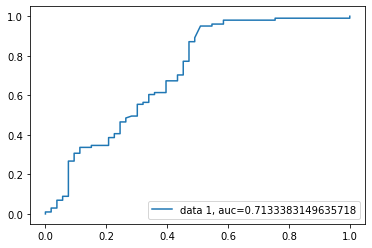

In [21]:
y_pred_proba = logistic_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

- comparitivly accuracy is better in logistic regression. auc of 0.71 is suggesting that the model is good , so use logistic regression to predict the eligibility of pred dataset

# Prediction of the model

In [22]:
prediction = logistic_model.predict(x_test)
print('Targets of test data:',prediction)

Targets of test data: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0]
